### **1-LINEAR REGRESSION**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso, Ridge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import precision_recall_curve, precision_score, recall_score,roc_curve,auc,log_loss,confusion_matrix,accuracy_score,mean_squared_error,root_mean_squared_error

In [2]:
df=pd.read_csv(r'C:\Users\naveen.maurya\OneDrive - Aurum\DESKTOP\python practice\steel yield strenth model\steel_strength.csv')
df.drop(columns=['formula','tensile strength', 'elongation'],inplace=True)

In [3]:
df

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength
0,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5
1,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1
2,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3
3,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3
4,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.38,0.18,0.01,7.27,0.01,3.77,0.96,0.00,0.01,4.90,0.00,0.03,0.00,1722.5
308,0.00,0.06,0.05,5.15,10.20,3.20,0.01,0.00,0.01,0.01,0.00,0.03,0.09,1019.0
309,0.37,0.17,0.01,5.20,0.01,5.84,1.05,0.00,0.91,4.88,0.00,0.03,0.00,1860.3
310,0.41,0.19,0.01,6.99,0.01,5.84,0.92,0.00,0.01,0.02,0.00,0.03,0.00,1812.1


In [5]:
Y=df['yield strength']
X=df.drop(columns='yield strength')
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=0)

linear regression can be categorized into 

**1-Simple Linear Regression using Least Squares** 

**2-Simple Linear Regression using Gradient Descent.**

Simple Linear Regression is a method used to model the relationship between a dependent variable y and an independent variable 
x. The model assumes that this relationship can be described by a straight line=
**y=β0+β1x+ϵ**

Here:


y is the dependent variable.

x is the independent variable.

β0 is the intercept (the value of y when x=0).

β1 is the slope (the change in y for a unit change in x).

ϵ is the error term.

Least Squares Method is used to estimate the parameters β0 and β1 by minimizing the sum of the squared differences between the observed values and the values predicted by the linear model. This is often referred to as minimizing the "sum of squared residuals.

**Objective of Least Squares** is to find the values of β0 and β1 that minimize the sum of the squared differences (errors) between the actual values yi and the predicted values ^yi

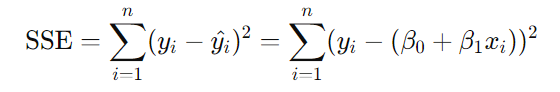

**Minimizing the SSE**

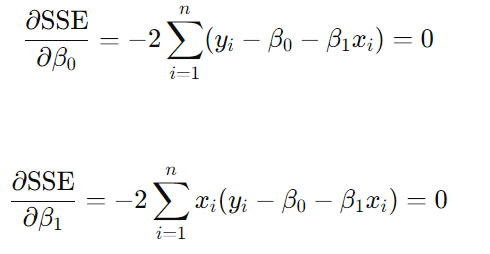

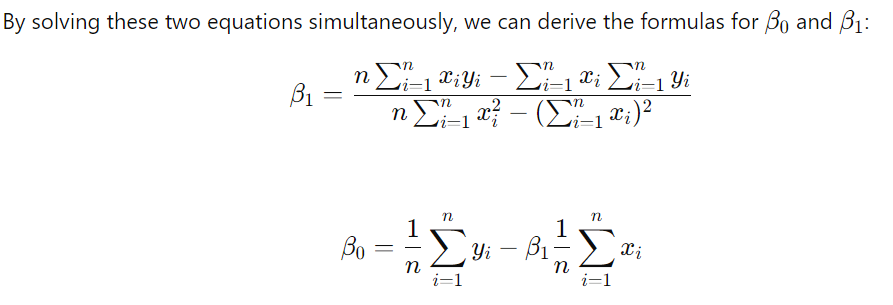

When you use the LinearRegression().fit(X, y) method in scikit-learn:

**Fit the Model:** The function automatically computes the best values of 
β0 and β1 using the Least Squares Method.
**Internally:** It uses matrix operations to efficiently calculate these coefficients, even for large datasets.

### ****HYPER PARAMETER IN LINEAR REGRESSION USING LEAST SQUARE****

**1-fit_intercept**

***If fit_intercept=True (default):***
The model will calculate the intercept β0.
This means that the regression line can move up or down to better fit the data.
The line can cross the y-axis at a point other than 0.

***If fit_intercept=False:***

The model will not calculate the intercept.
This means that the regression line is forced to pass through the origin (0,0).
The line will only tilt or rotate based on the slope β1, but it can't move up or down

In [5]:
lnr=LinearRegression(fit_intercept=True)
lnr.fit(x_train,y_train)
y_test_pred = lnr.predict(x_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(test_rmse)

207.5104388506005


***Impact of Setting fit_intercept=False***
When fit_intercept=False is used:
The model assumes that your data is already centered.

It assumes that the relationship between x and y naturally passes through the origin (0,0).

Therefore, it doesn't calculate an intercept, and the regression line is forced to go through the origin.

This can lead to a less accurate model if the data isn't actually centered, meaning the regression line might not fit the data well.

In [8]:
lnr=LinearRegression(fit_intercept=False)
lnr.fit(x_train,y_train)
y_test_pred = lnr.predict(x_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(test_rmse)

224.54213925516893


Normalization  had an effect only when fit_intercept=True.

**2-copy_X**
Description: Whether to copy X (the input data) before fitting the model. If True, the input X will be copied. If False, the model may overwrite the input X.

Type: bool

Default: True

Impact: If set to False, memory usage can be reduced, but this can also alter the input data

In [9]:
lnr=LinearRegression(copy_X=True)
lnr.fit(x_train,y_train)
y_test_pred = lnr.predict(x_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(test_rmse)

207.5104388506005


In [10]:
lnr=LinearRegression(copy_X=False)
lnr.fit(x_train,y_train)
y_test_pred = lnr.predict(x_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(test_rmse)

207.5104388506005


**3-n-jobs**

Description: The number of CPU cores to use during the computation. If set to -1, all available cores will be used. If set to None, only one core will be used.

Type: int or None

Default: None

Impact: Can speed up the computation when dealing with very large datasets by parallelizing the operations.

In [11]:
lnr=LinearRegression(n_jobs=-1)
lnr.fit(x_train,y_train)
y_test_pred = lnr.predict(x_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(test_rmse)

662.7799316235507


**4-positive**

Description: When set to True, the coefficients are constrained to be positive. This can be useful in scenarios where you expect or require that the relationship between the dependent and independent variables is positive.

Type: bool

Default: False

Impact: Helps in scenarios where negative coefficients do not make sense for the problem domain.

In [12]:
lnr=LinearRegression()
lnr.fit(x_train,y_train)
y_test_pred = lnr.predict(x_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(test_rmse)

662.7799316235507


In [13]:
lnr.coef_

array([ 1.60131281e+03, -7.27447953e+00,  1.42610651e+01,  3.76333539e+00,
        1.68228810e+01,  1.74077333e+00,  5.61903365e+01,  2.68617315e+02,
       -2.95862423e+01,  1.33928469e+01, -1.52630907e+00,  2.16286670e+02,
        3.44270447e+02])

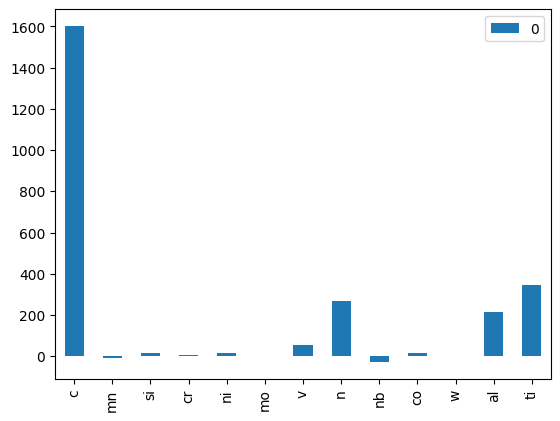

In [14]:
pd.DataFrame(lnr.coef_,index=lnr.feature_names_in_).plot(kind='bar')
plt.show()

In [15]:
lnr=LinearRegression(positive=True)
lnr.fit(x_train,y_train)
y_test_pred = lnr.predict(x_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(test_rmse)

677.3139755709407


In [16]:
lnr.coef_

array([1609.50463086,    0.        ,   14.73144562,    4.16372504,
         17.47212227,    2.80004219,   52.16744416,  254.44118824,
          0.        ,   13.65708171,    0.        ,  216.46874919,
        343.09502829])

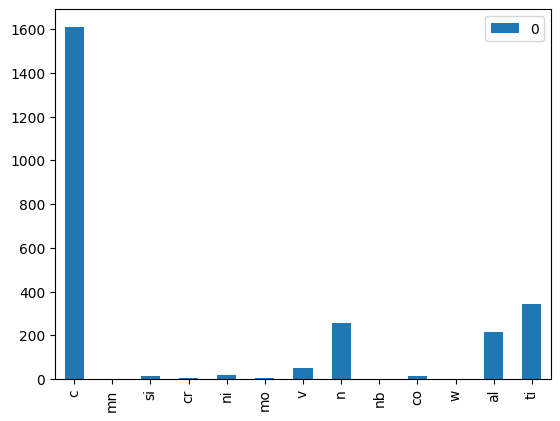

In [17]:
pd.DataFrame(lnr.coef_,index=lnr.feature_names_in_).plot(kind='bar')
plt.show()

### **SIMPLE LINEAR REGRESSION USING GRADIENT DESCEND**

Simple Linear Regression aims to model the relationship between a single independent variable x and a dependent variable y by fitting a straight line to the data. The goal is to find the line that best predicts the dependent variable.

Initialize Parameters: Start with initial guesses for β0 and β1. Compute Cost Function: The cost function (often Mean Squared Error, MSE) measures the difference between the predicted values and the actual values.

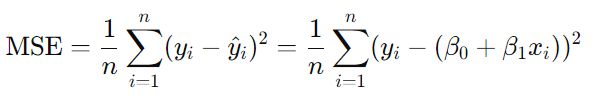

Update Parameters: Adjust β0 and β1 to reduce the cost function using the gradients (partial derivatives) with respect to these parameters.

Gradient with respect to β0:

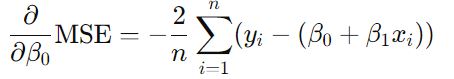

Gradient with respect to β1:

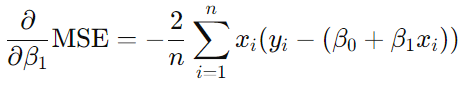

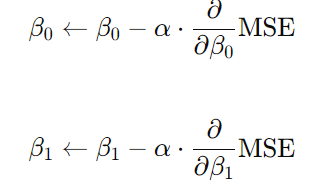

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Initialize parameters
beta_0 = 0  # Intercept
beta_1 = 0  # Slope
alpha = 0.01  # Learning rate
epochs = 1000  # Number of iterations
n=len(X)
for i in range(epochs):
    Y_pred=beta_1*X+beta_0
    MSE=1/n*np.sum((Y-Y_pred)**2)
    # Calculate the gradients
    d_beta_0=-2/n*np.sum(Y-(Y_pred))
    d_beta_1=-2/n*np.sum(X*(Y-(Y_pred)))
    # Update the parameters
    beta_0=beta_0-alpha*d_beta_0
    beta_1 = beta_1 - alpha * d_beta_1
    # Print the cost for every 100 iterations
# Final parameters
print(f'Final parameters: beta_0 = {beta_0}, beta_1 = {beta_1},MSE={MSE}')
    

Final parameters: beta_0 = 0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
ni    0.0
si    0.0
ti    0.0
v     0.0
w     0.0
Length: 325, dtype: float64, beta_1 = 0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
ni    0.0
si    0.0
ti    0.0
v     0.0
w     0.0
Length: 325, dtype: float64,MSE=0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
ni    0.0
si    0.0
ti    0.0
v     0.0
w     0.0
Length: 325, dtype: float64


**SGDRegressor in scikit-learn is an implementation that allows you to use gradient descent for linear regression:**

### **2- REGULARIZATION**

Regularization is a technique used in machine learning to prevent overfitting by adding a penalty to the loss function. Overfitting occurs when a model becomes too complex, capturing noise in the training data rather than the underlying pattern. Regularization helps in simplifying the model, encouraging it to have smaller coefficients, which generally leads to better generalization to unseen data.

**1. L1 Regularization (Lasso)**

**L1 Regularization**, also known as **Lasso (Least Absolute Shrinkage and Selection Operator)**, adds a penalty equal to the absolute value of the magnitude of the coefficients. The regularized loss function becomes:

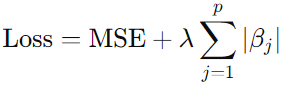

Where:


λ is the regularization strength (a hyperparameter that controls the amount of shrinkage).βj are the coefficients of the model.

​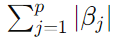 is the L1 norm, which is the sum of the absolute values of the coefficients.

L1 regularization can shrink some coefficients to exactly zero, effectively performing feature selection. 

**L2 Regularization**, also known as **Ridge Regression**, adds a penalty equal to the square of the magnitude of the coefficients. The regularized loss function becomes:

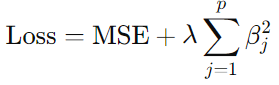 

Where:

λ is the regularization strength.

βj are the coefficients of the model.

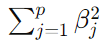 is the L2 norm, which is the sum of the squares of the coefficients.

In [20]:
lasso = Lasso(alpha=0.8) # alpha is the regularization strength
lasso.fit(x_train,y_train)
y_test_pred = lasso.predict(x_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(test_rmse)

566.4634876862204


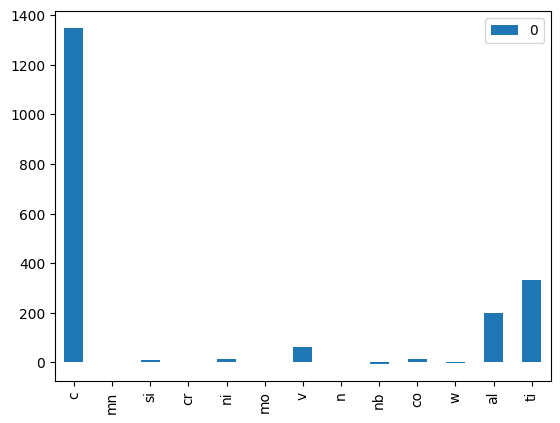

In [21]:
pd.DataFrame(lasso.coef_,index=lasso.feature_names_in_).plot(kind='bar')
plt.show()

in above coefficient reduces , and some of them become zero

In [22]:
ridge = Ridge(alpha=2)  # alpha is the regularization strength
ridge.fit(x_train,y_train)
y_test_pred = ridge.predict(x_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(test_rmse)

241.62927529762067


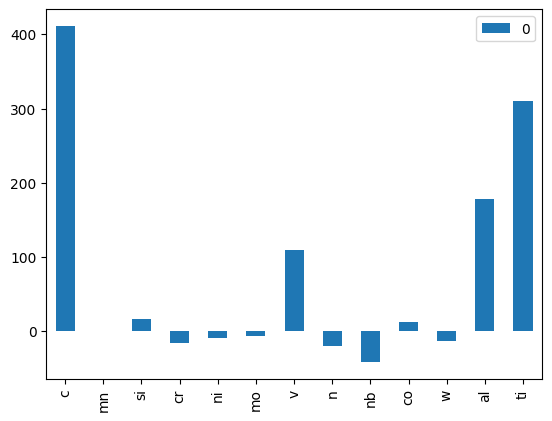

In [23]:
pd.DataFrame(ridge.coef_,index=ridge.feature_names_in_).plot(kind='bar')
plt.show()

Here we can see that coefficient has been reduced upto large extend

### **3-KNN REGRESSOR**
K-Nearest Neighbors (KNN) Regressor is a type of instance-based learning or non-generalizing learning, where the model does not explicitly learn a function from the training data but instead stores the training instances and makes predictions based on the proximity of the data points.

**Training Phase:**
Unlike other machine learning models, KNN doesn’t have an explicit training phase where a model is fitted to the data. Instead, it memorizes the training data.

**Prediction Phase:**
When making a prediction for a new data point, the KNN algorithm looks at the 'k' nearest data points (neighbors) from the training dataset.
The predicted value for the new data point is calculated as the average of the target values of these 'k' nearest neighbors.

**Mathematical Explanation**

***Distance Metric:***
The KNN regressor uses a distance metric to find the 'k' nearest neighbors. The most common distance metric is the Euclidean distance.

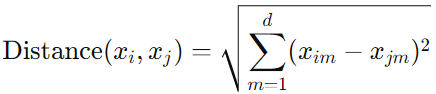

Other distance metrics like Manhattan distance, Minkowski distance, etc., can also be used depending on the problem.

***2. Finding Neighbors:***
For a new data point x, the algorithm calculates the distance from x to all points in the training data.It then selects the 'k' points in the training data that are closest to x.

***3. Prediction:***
The prediction ^y for the new data point x is the average of the target values yi of the 'k' nearest neighbors:

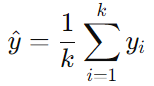

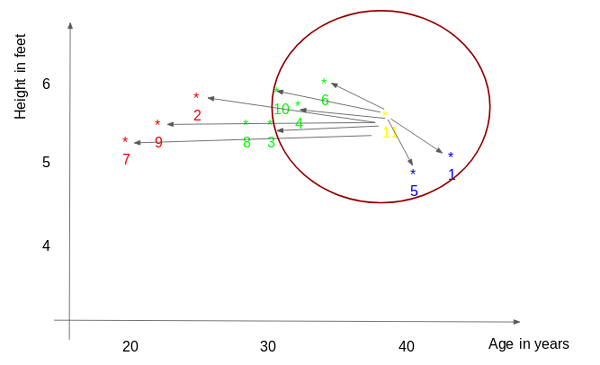

In [39]:
error=[]
for i in range(1,150):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_test_pred = knn.predict(x_test)
    test_rmse = root_mean_squared_error(y_test, y_test_pred)
    error.append(test_rmse)
    print('for k='+str(i)+'==rsme is=='+str(test_rmse))

for k=1==rsme is==133.6949839126519
for k=2==rsme is==144.48372883801196
for k=3==rsme is==154.83932478922154
for k=4==rsme is==157.5575086033263
for k=5==rsme is==152.52764317301603
for k=6==rsme is==150.72628711953868
for k=7==rsme is==158.0942772573371
for k=8==rsme is==172.0631260228891
for k=9==rsme is==181.87525996630745
for k=10==rsme is==191.3534745471756
for k=11==rsme is==195.00739770812095
for k=12==rsme is==205.11456393095034
for k=13==rsme is==214.20533715736457
for k=14==rsme is==222.2921179846129
for k=15==rsme is==229.18665054325047
for k=16==rsme is==234.7041459297337
for k=17==rsme is==245.0023634786768
for k=18==rsme is==249.20270129569352
for k=19==rsme is==250.02309890576964
for k=20==rsme is==251.2104230097219
for k=21==rsme is==253.8321009031981
for k=22==rsme is==253.04449489922575
for k=23==rsme is==255.52229831749963
for k=24==rsme is==256.92544176321195
for k=25==rsme is==257.32224430989413
for k=26==rsme is==258.86391845532194
for k=27==rsme is==259.73224644

<Axes: >

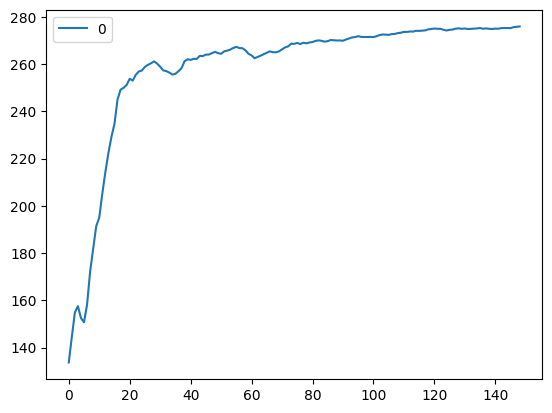

In [40]:
curve = pd.DataFrame(error) #elbow curve 
curve.plot()

use gridsearchcv to get best parameter

In [45]:
# Define the range of k values to search
param_grid = {'n_neighbors': np.arange(1, 100)}

# GridSearchCV with 5-Fold Cross-Validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=149),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='neg_mean_squared_error')

In [46]:
# Best k value
best_k = grid_search.best_params_['n_neighbors']
print(f'Best k value: {best_k}')

Best k value: 3


### **4-GRADIENT DESCEND**

Gradient descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It's an iterative approach to finding the optimal parameters (weights) that minimize a cost function (usually a measure of error).

***Cost Function:***
For simplicity, consider a linear regression model where we want to minimize the cost function J(θ) with respect to the model parameters θ. The cost function is often the Mean Squared Error (MSE):

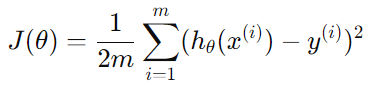

Where:

m is the number of training examples.

hθ(x(i)) is the hypothesis or prediction for the i-th example.

y(i) is the actual value for the i-th example.

θ is the vector of parameters.

***Gradient:***
The gradient of the cost function with respect to each parameter θj is:

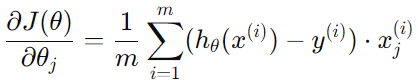

***Gradient Descent Update Rule:***
To update the parameters θ, we use the following rule:

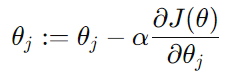
Where α is the learning rate, a small positive number that controls the step size.

**Types of Gradient Descent :-**

***Batch Gradient Descent (BGD):*** Uses the entire dataset to compute the gradient of the cost function. It guarantees convergence but can be slow with large datasets

***Stochastic Gradient Descent (SGD):*** Uses only one training example to compute the gradient and update the parameters. It can converge faster but introduces more noise in the convergence process

***Mini-batch Gradient Descent:*** A compromise between BGD and SGD, it uses a small batch of training examples to compute the gradient. This balances the convergence speed and noise

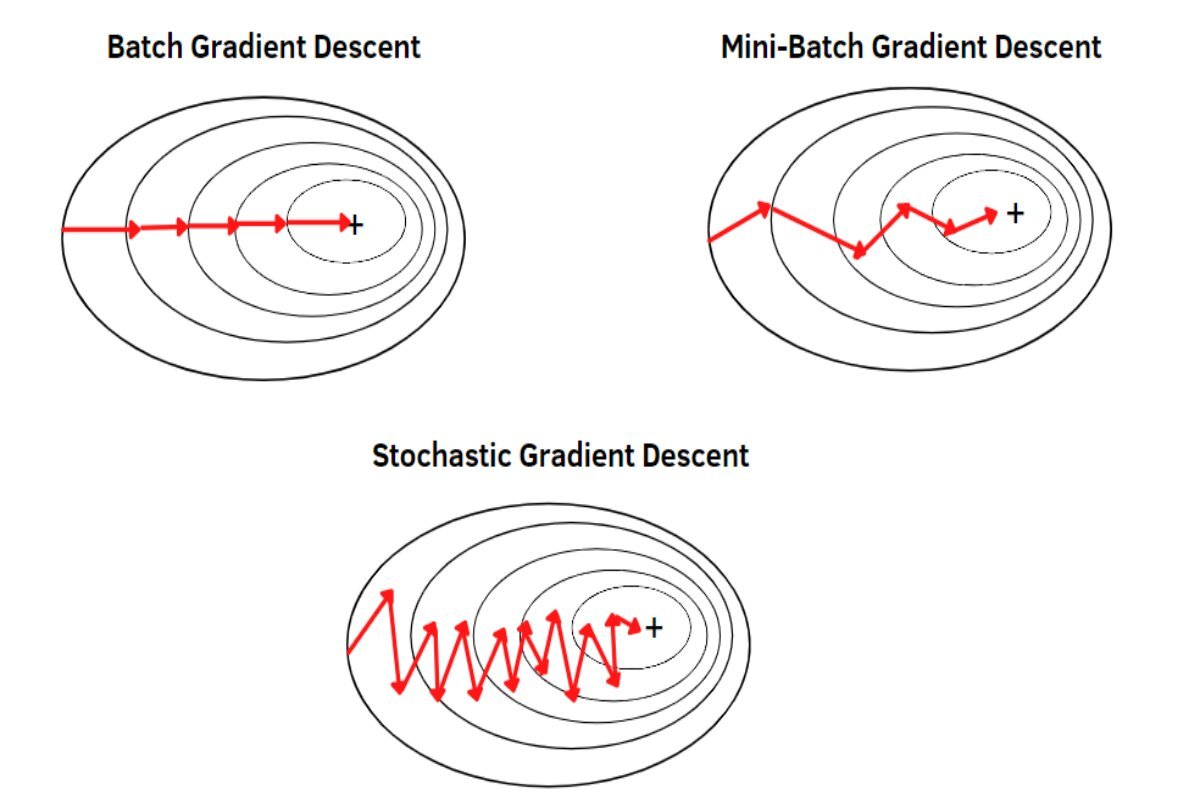

**Maths Behind This**

Consider the simplest case of a linear regression model with one feature:



The cost function is:

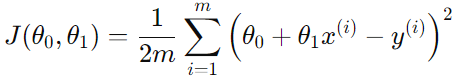

The gradient with respect to each parameter is:

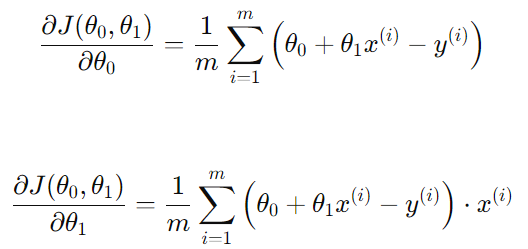

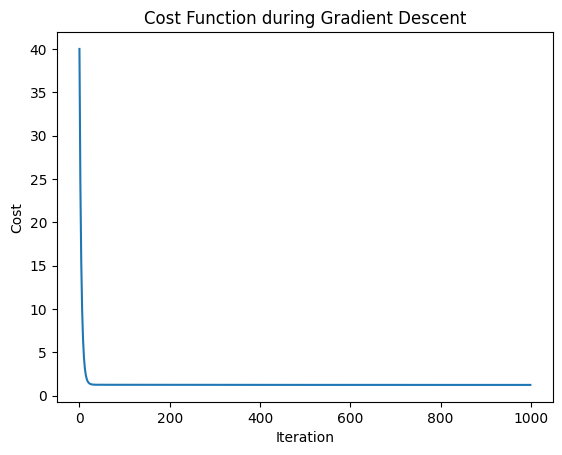

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
X = np.array([1, 2, 3, 4, 5])
y = np.array([3, 7, 5, 11, 14])

# Initialize parameters
theta_0 = 0
theta_1 = 0
alpha = 0.01  # learning rate
m = len(y)  # number of data points
num_iterations = 1000  # number of iterations

# Cost function values
cost_values = []

# Re-initialize parameters
theta_0 = 0
theta_1 = 0

# Gradient Descent Algorithm with cost calculation
for _ in range(num_iterations):
    h = theta_0 + theta_1 * X
    cost = (1/(2*m)) * sum((h - y)**2)  # Cost function
    cost_values.append(cost)
    
    gradient_0 = (1/m) * sum(h - y)
    gradient_1 = (1/m) * sum((h - y) * X)
    
    theta_0 = theta_0 - alpha * gradient_0
    theta_1 = theta_1 - alpha * gradient_1

# Plot the cost function values
plt.plot(range(num_iterations), cost_values)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function during Gradient Descent')
plt.show()


### **4-SGD REGRESSOR**

SGDRegressor is a linear model fitted using Stochastic Gradient Descent (SGD). Unlike the traditional methods (like Ordinary Least Squares), which use the entire dataset to calculate the gradient and update the weights, SGDRegressor updates the model weights using one sample at a time. This makes it particularly useful for large-scale and online learning problems.

In [102]:
# SGD Regressor
sgd_regressor = SGDRegressor()
# max_iter=1000, tol=1e-3, penalty='l2', alpha=0.01, learning_rate='constant', eta0=0.01

# Fit the model
sgd_regressor.fit(x_train, y_train)

# Predict
y_pred = sgd_regressor.predict(x_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
print(f'SGD Regression RMSE: {rmse}')
print(f'Coefficients: {sgd_regressor.coef_}')
print(f'Intercept: {sgd_regressor.intercept_}')

SGD Regression RMSE: 17.868563246657764
Coefficients: [150.67901579   1.59068274  42.96559861  37.19687406  41.97069469
  63.3250654  205.73004408  -9.37574422  42.53946314  16.31196462
  40.58114146 -14.43133146 159.98485394]
Intercept: [213.96279933]


**Hyperparameters of SGDRegressor**

***max_iter:***

The maximum number of iterations (epochs). Each iteration corresponds to one pass over the training dataset.

***tol:***

The tolerance for the stopping criterion. Training will stop if the change in the loss function is smaller than this threshold.

***penalty:***

The regularization term. It can be 'l2' (Ridge), 'l1' (Lasso), or 'elasticnet' (a combination of L1 and L2).

***alpha:***

The regularization strength. It controls the penalty applied to the coefficients. Higher values result in more regularization (shrinkage of the coefficients).

***learning_rate:***

Controls the schedule of the learning rate. Common options include:
'constant': A constant learning rate.
'optimal': Adjusts the learning rate based on an estimate of the optimal value.
'invscaling': Decreases the learning rate as a function of the inverse of the iteration number.
'adaptive': Decreases the learning rate if the loss does not improve.

***eta0:***

The initial learning rate used when learning_rate is set to 'constant', 'invscaling', or 'adaptive'.

***power_t:***

The exponent for inverse scaling learning rate. Only relevant when learning_rate is set to 'invscaling'.

***early_stopping:***

If set to True, the model will stop training when the validation score is not improving.

***validation_fraction:***

The proportion of training data used for validation when early_stopping=True.

***shuffle:***

Whether or not to shuffle the training data before each epoch. Shuffling can help escape local minima.

***verbose:***

Controls the verbosity of the output during training.

***random_state:***

Controls the randomness of the initial weights, the data shuffling, and the cross-validation splits.

In [94]:
# Define the grid of hyperparameters
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 1500, 2000]
}

# Perform Grid Search
grid_search = GridSearchCV(sgd_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'eta0': [0.001, 0.01, 0.1],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'max_iter': [1000, 1500, 2000],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='neg_mean_squared_error')

In [95]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", -grid_search.best_score_)

Best Parameters: {'alpha': 0.001, 'eta0': 0.001, 'learning_rate': 'adaptive', 'max_iter': 1500, 'penalty': 'l1'}
Best Cross-Validation Score: 93774.3571273096


In [98]:
best_model=grid_search.best_estimator_

In [101]:
# Predict
y_pred = best_model.predict(x_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
print(f'SGD Regression RMSE: {rmse}')

SGD Regression RMSE: 17.625201009876623


### **5-SUPPORT VECTOR REGRESSOR**

SVR tries to find a hyperplane that best fits the data within a certain margin of tolerance.

**Theory Behind SVR**

***Objective:***

SVR aims to find a function that has at most a certain deviation (ε) from the actual target values for all training data points. The goal is to fit the data within a "tube" of width 2ϵ and minimize the model's complexity, as measured by the norm of the weights w.

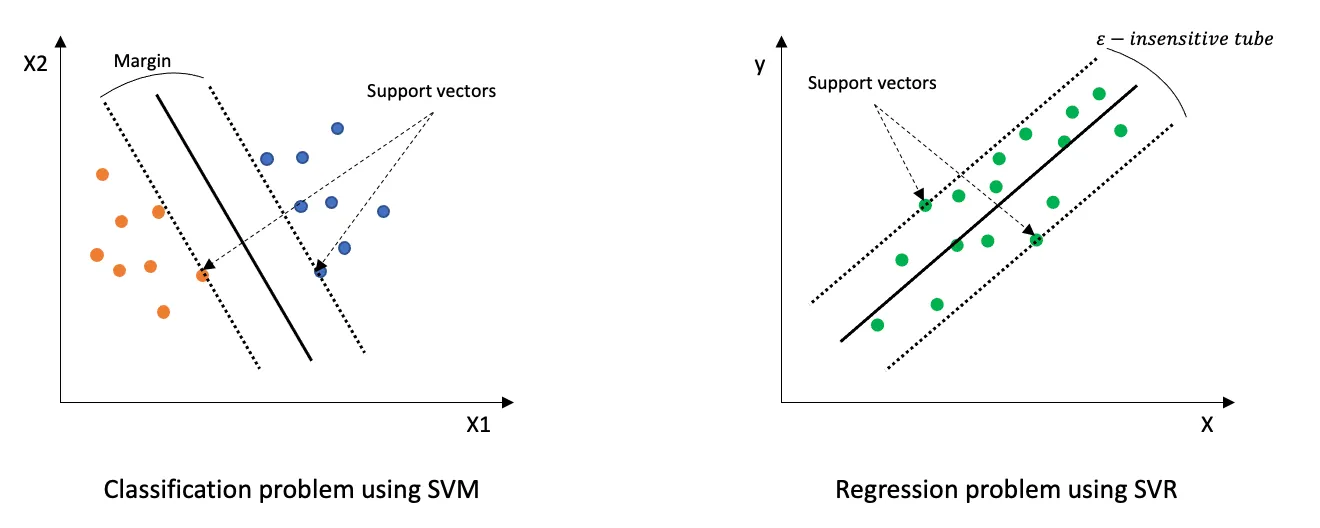

***Margin of Tolerance (ε):***

The model allows some error or margin of tolerance ϵ within which no penalty is assigned to errors. The idea is to ignore small errors that are within this margin and focus on larger deviations.

The margin is defined as the error tolerance of the model, which is also called as the ε-insensitive tube.
The hyperplane is the best fit possible to the data that fall within the 𝜖-insensitive tube.


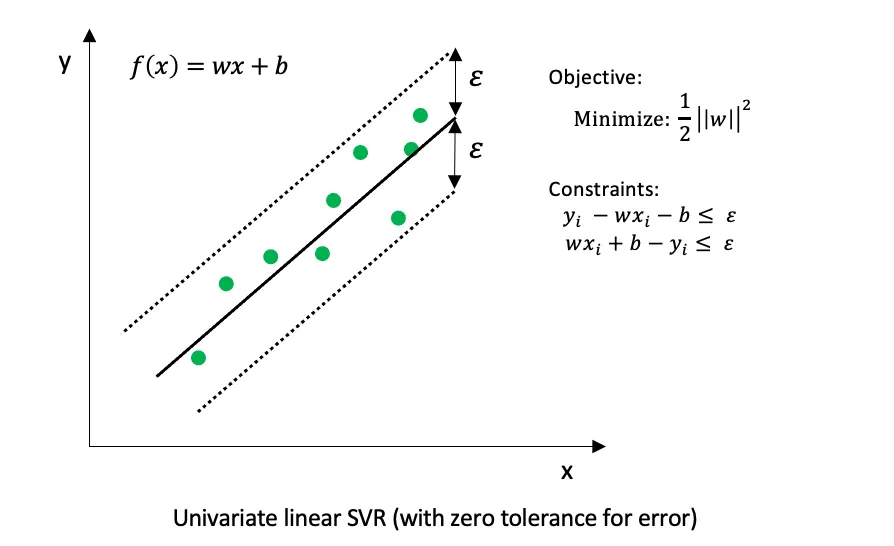


***Slack Variables (ξ and ξ*):***

Slack variables ξ and ξ∗ are introduced to handle cases where data points fall outside the ε-tube. These variables measure the deviation of points outside the margin.

To balance the trade-off between the model complexity (i.e., flatness of f(x)) and total deviations beyond ε-insensitive tube, we utilize a regularization parameter 𝐶 > 0. The strength of the regularization is inversely proportional to C.

The distance of slack variables from ε-insensitive tube boundary is represented as ξ.

SVR assigns zero prediction error to the points that lie inside the ε-insensitive tube, whereas it penalizes the slack variables proportionally to their ξ. This feature of SVR enables it to handle overfitting more effectively than ordinary regression models.

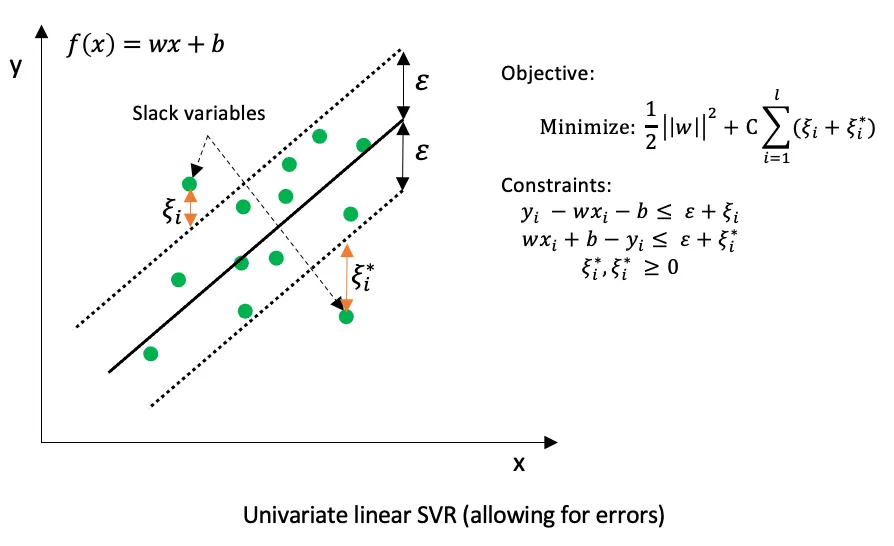

***Optimization Problem:***

The optimization problem in SVR is to minimize the model's complexity while penalizing data points that fall outside the ε-tube.

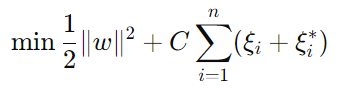

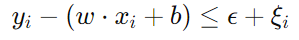

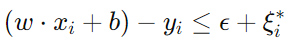

SVR can be used for both linear and non-linear regression problems by using various kernel functions.
Common kernel functions used in SVR include linear, polynomial, radial basis function (RBF), and sigmoid.

****C:**** The regularization parameter that controls the trade-off between model complexity and the amount up to which deviations larger than ϵ are tolerated.

Hyperparameters of SVR

***C (Regularization Parameter):***

Purpose: Controls the trade-off between the model's complexity and the amount up to which deviations larger than 𝜖 are tolerated.

Effect: A smaller value of 𝐶 creates a wider margin but allows more violations (i.e., more data points lying outside the margin). A larger value of 𝐶 aims to minimize errors, at the risk of a more complex model that may overfit.

***epsilon (ε):***

Purpose: Defines the margin of tolerance where no penalty is assigned to the errors. It determines the width of the tube within which predictions are considered "good enough."

Effect: A larger 𝜖 means that more errors are tolerated without penalty, which can lead to a simpler model with potentially more underfitting. A smaller 𝜖 makes the model fit the data more tightly, potentially leading to overfitting.

***kernel:***

Purpose: Determines the type of hyperplane used to separate the data. Common kernels include:

'linear': For linear relationships.

'poly': Polynomial kernel for polynomial relationships.

'rbf': Radial Basis Function (Gaussian) kernel for non-linear relationships.

'sigmoid': For sigmoid relationships.

Effect: The choice of kernel affects how well the model can capture the underlying pattern in the data. The RBF kernel is the most commonly used for non-linear data.

***gamma:***

Purpose: Applicable for the RBF, polynomial, and sigmoid kernels. It defines how far the influence of a single training example reaches.

Effect: A low gamma value means that each point has a far-reaching influence, leading to smoother decision boundaries. A high gamma value means that the influence of each point is confined to its immediate vicinity, which can lead to more complex boundaries and potentially overfitting.

***degree:***

Purpose: Applicable only for the polynomial kernel. It defines the degree of the polynomial used in the kernel function.

Effect: Higher degrees can capture more complex relationships but may also lead to overfitting.

***coef0:***

Purpose: Applicable for polynomial and sigmoid kernels. It controls the influence of higher-order terms in the kernel function.

Effect: Affects the shape of the decision boundary when using non-linear kernels.

***tol:***

Purpose: The tolerance for stopping criteria. It determines when the algorithm should stop iterating.

Effect: Lower values lead to more precise solutions but require more iterations.

***max_iter:***

Purpose: The maximum number of iterations to be run.

Effect: Controls the computational budget. If the algorithm does not converge within the specified number of iterations, it will stop.

In [6]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [7]:
svr_lin = SVR(kernel = 'linear',ep)
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

In [8]:
### When using StandardScaler(), fit() method expects a 2D array-like input
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
svr_lin.fit(x_train_scaled, y_train)
svr_rbf.fit(x_train_scaled, y_train)
svr_poly.fit(x_train_scaled, y_train)

SVR(kernel='poly')

In [10]:
#### Model prediction for train dataset ####
linear_svr_pred = svr_lin.predict(x_train_scaled)
rbf_svr_pred = svr_rbf.predict(x_train_scaled)
poly_svr_pred= svr_poly.predict(x_train_scaled)

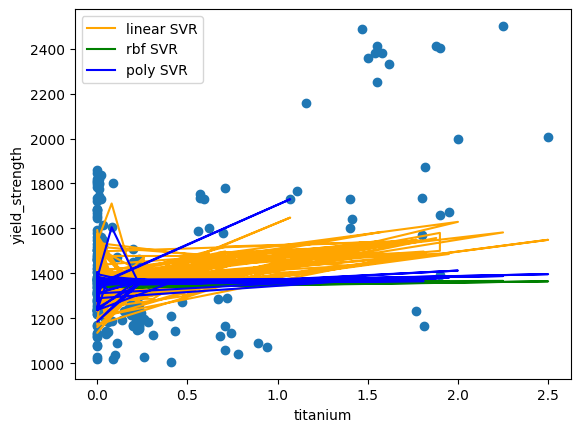

In [18]:
#### Visualization ####
plt.scatter(x_train['ti'], y_train)
plt.plot(x_train['ti'], linear_svr_pred, color = 'orange', label = 'linear SVR')
plt.plot(x_train['ti'], rbf_svr_pred, color = 'green', label = 'rbf SVR')
plt.plot(x_train['ti'], poly_svr_pred, color = 'blue', label = 'poly SVR')
plt.legend()
plt.xlabel('titanium')
plt.ylabel('yield_strength')
plt.show()

### **6-DECISION TREE REGRESSOR**

**Decision Tree Terminologies**

***Root Node:*** The initial node at the beginning of a decision tree, where the entire population or dataset starts dividing based on various features or conditions.

***Decision Nodes:*** Nodes resulting from the splitting of root nodes are known as decision nodes. These nodes represent intermediate decisions or conditions within the tree.

***Leaf Nodes:*** Nodes where further splitting is not possible, often indicating the final classification or outcome. Leaf nodes are also referred to as terminal nodes.

***Sub-Tree:*** Similar to a subsection of a graph being called a sub-graph, a sub-section of a decision tree is referred to as a sub-tree. It represents a specific portion of the decision tree.

***Pruning:*** The process of removing or cutting down specific nodes in a decision tree to prevent overfitting and simplify the model.

***Branch / Sub-Tree:*** A subsection of the entire decision tree is referred to as a branch or sub-tree. It represents a specific path of decisions and outcomes within the tree.

***Parent and Child Node:*** In a decision tree, a node that is divided into sub-nodes is known as a parent node, and the sub-nodes emerging from it are referred to as child nodes. The parent node represents a decision or condition, while the child nodes represent the potential outcomes or further decisions based on that condition

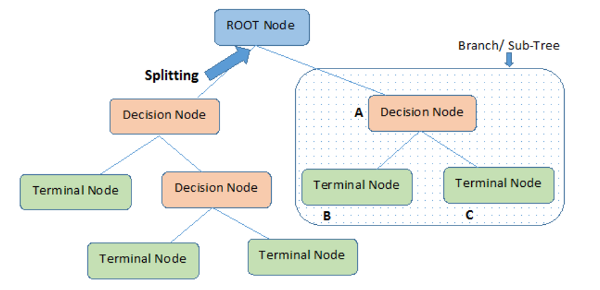

**Mathematics Behind Decision Tree Regressor**

***1. Splitting Criteria***
The main goal of a Decision Tree Regressor is to find splits that reduce the impurity of the target variable in the resulting nodes. For regression, the common criterion is Mean Squared Error (MSE).

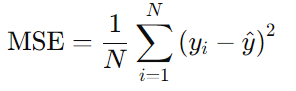

Where:

𝑦𝑖 is the actual target value.𝑦^ is the predicted target value (mean of the values in that node).𝑁 is the number of samples in the node.
The algorithm seeks to minimize the MSE by selecting splits that result in the lowest combined MSE for the child nodes.

Consider the following dataset with two features (X1, X2) and one target variable (Y):

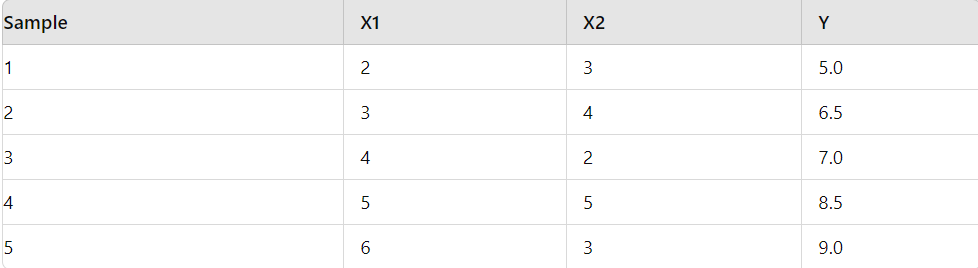

***Step 1: Initial Calculation of MSE at the Root***

Before any splits, the entire dataset is at the root node. We first calculate the MSE for the entire dataset. The MSE is calculated as:

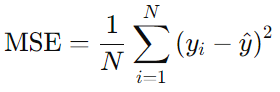

Where:

𝑁=5(the number of samples)

𝑦𝑖 are the actual values of Y

𝑦^ is the mean of the target variable in the node.

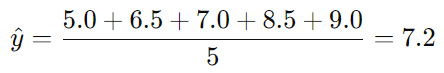

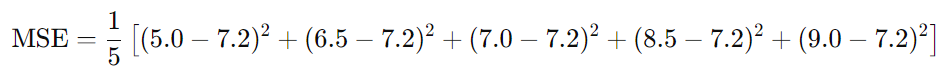

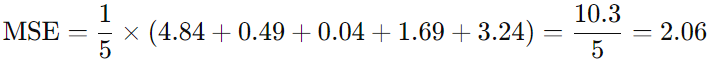

***Step 2: Evaluate Splits***

Now, we'll evaluate potential splits for the features X1 and X2. Let's start with X1.

Split on X1 at Value 4

If we split on X1 = 4, the dataset is divided into two groups:

Left Node (samples where X1 <= 4):

Samples: 1, 2, 3

Target values: 5.0, 6.5, 7.0

Right Node (samples where X1 > 4):

Samples: 4, 5

Target values: 8.5, 9.0

Left Node MSE:

Mean of Y in the left node: 

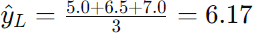

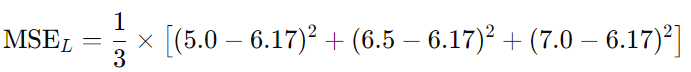=0.72

Right Node MSE:

Mean of Y in the right node:

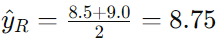

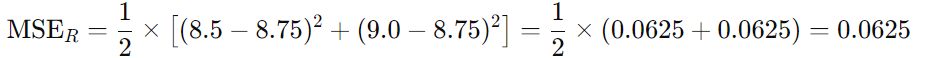

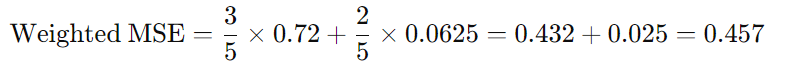

***Step 3: Calculate the Reduction in MSE***

The reduction in MSE (also known as Variance Reduction) due to the split on X1 = 4 is:

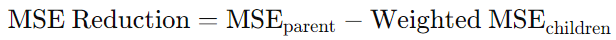

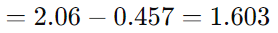
​


In [34]:
# Step 1: Import Libraries
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import numpy as np
# Step 3: Train the Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=3, random_state=42)

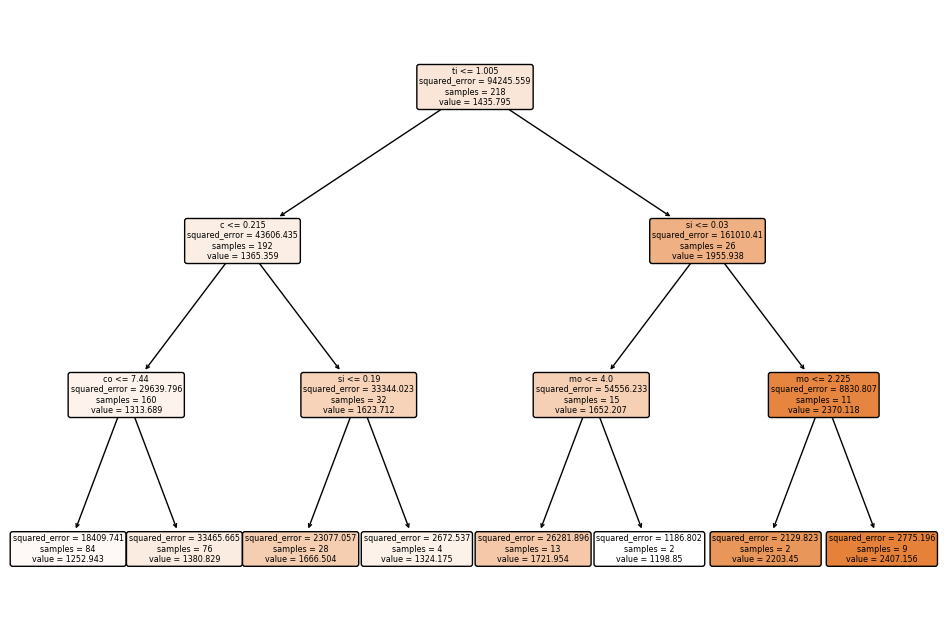

In [35]:
# Step 4: Plot the Decision Tree
plt.figure(figsize=(12,8))
tree.plot_tree(regressor, feature_names=x_train.columns, filled=True, rounded=True)
plt.show()